In [2]:
import cv2
import numpy as np

In [7]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
count=0
while(count<50):
    try:
        count+=1
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Our operations on the frame come here
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Display the resulting frame
        cv.imshow('frame',frame)
        if cv.waitKey(24) & 0xFF == ord('q'):
            break
    except:
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

cv.imshow('first',frame)
if cv.waitKey(0) & 0xFF == ord('q'):
    cap.release()
    cv.destroyAllWindows()
    
# cv.imwrite('Patrick.png', frame)

In [3]:
import cv2
import numpy as np

def sift_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of SIFT matches between them
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    image2 = image_template

    # Create SIFT detector object
    #sift = cv2.SIFT()
    sift = cv2.xfeatures2d.SIFT_create()
    # Obtain the keypoints and descriptors using SIFT
    keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

    # Define parameters for our Flann Matcher
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
    search_params = dict(checks = 100)

    # Create the Flann Matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Obtain matches using K-Nearest Neighbor Method
    # the result 'matchs' is the number of similar matches found in both images
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)

    # Store good matches using Lowe's ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m) 
    return len(good_matches)

cap = cv2.VideoCapture(0)

# Load our image template, this is our reference image
image_template = cv2.imread('Patrick.png', 0) 

while True:
    # Get webcam images
    ret, frame = cap.read()

    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions
    top_left_x = int (width / 3)
    top_left_y = int ((height / 2) + (height / 4))
    bottom_right_x = int ((width / 3) * 2)
    bottom_right_y = int ((height / 2) - (height / 4))

    # Draw rectangular window for our region of interest   
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), 255, 3)

    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)

    # Get number of SIFT matches
    matches = sift_detector(cropped, image_template)

    # Display status string showing the current no. of matches 
    cv2.putText(frame,str(matches),(450,450), cv2.FONT_HERSHEY_COMPLEX, 2,(0,255,0),1)

    # Our threshold to indicate object deteciton
    # We use 10 since the SIFT detector returns little false positves
    threshold = 80

    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
    cv2.imshow('Object Detector using SIFT', frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
print(cv2.__version__)

NameError: name 'cv2' is not defined

In [4]:
cap.release()

In [35]:
import cv2
import numpy as np

# Create our body classifier
body_classifier = cv2.CascadeClassifier('./CascadeFiles/haarcascade_fullbody.xml')

# Initiate video capture for video file, here we are using the video file in which pedestrians would be detected
cap = cv2.VideoCapture(r'./OpenCVResources/moskva.mov')

# Loop once video is successfully loaded
while cap.isOpened():

    # Reading the each frame of the video 
    ret, frame = cap.read()

  # here we are resizing the frame, to half of its size, we are doing to speed up the classification
 # as larger images have lot more windows to slide over, so in overall we reducing the resolution
#of video by half that’s what 0.5 indicate, and we are also using quicker interpolation method that is #interlinear
    frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Pass frame to our body classifier
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.imshow('Pedestrians', frame)

    if cv2.waitKey(24) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

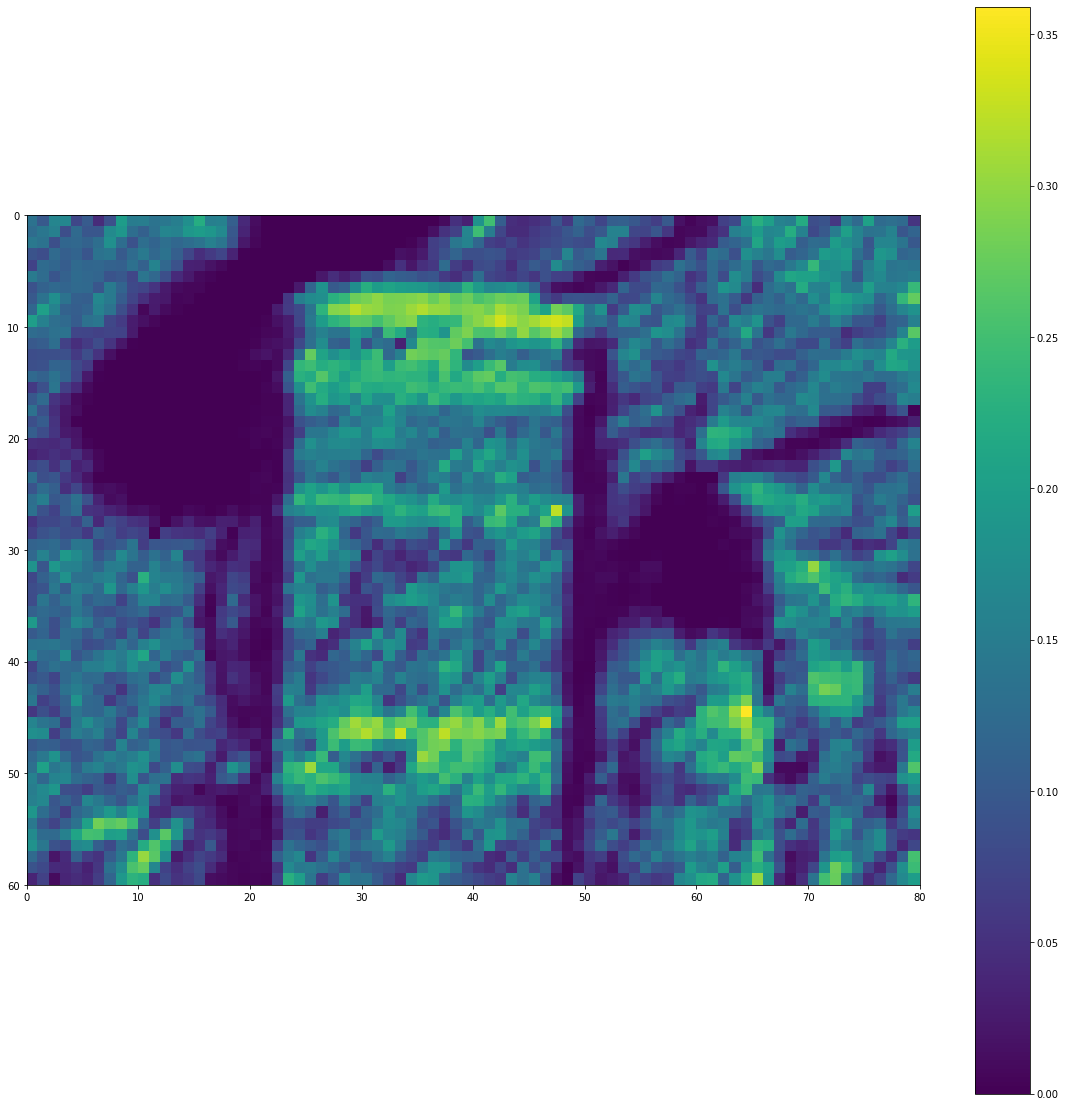

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image then grayscale
image = cv2.imread('Patrick.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show original Image
cv2.imshow('Input Image', image)
cv2.waitKey(0)

#defining the parameters, cell size and block size
# h x w in pixels
cell_size = (8, 8) 

 # h x w in cells
block_size = (2, 2) 

# number of orientation bins
nbins = 9

# Using OpenCV's HOG Descriptor
# winSize is the size of the image cropped to a multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(gray.shape[1] // cell_size[1] * cell_size[1],
                                  gray.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

# Create numpy array shape which we use to create hog_features
n_cells = (gray.shape[0] // cell_size[0], gray.shape[1] // cell_size[1])

# We index blocks by rows first.
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.
hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4))  

# Create our gradients array with nbin dimensions to store gradient orientations 
gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# Create array of dimensions 
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

# Block Normalization
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Plot HOGs using Matplotlib
# angle is 360 / nbins * direction

color_bins = 5
plt.figure(figsize=(20,20))
plt.pcolor(gradients[:, :, color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()
cv2.destroyAllWindows()

In [14]:
import cv2
cv2.__file__

'C:\\Users\\Mohammad-A.Musa\\AppData\\Anaconda\\lib\\site-packages\\cv2\\cv2.cp37-win_amd64.pyd'

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflownightly'

In [39]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [44]:
tf.__file__

'C:\\Users\\Mohammad-A.Musa\\AppData\\Anaconda\\lib\\site-packages\\tensorflow\\__init__.py'

In [45]:
tf

<module 'tensorflow' from 'C:\\Users\\Mohammad-A.Musa\\AppData\\Anaconda\\lib\\site-packages\\tensorflow\\__init__.py'>

In [46]:
tf.__version__

'2.0.0'

In [47]:
import os
import sys
args = sys.argv
directory = args[1]
protoc_path = args[2]
# for file in os.listdir(directory):
#     if file.endswith(".proto"):
#         os.system(protoc_path+" "+directory+"/"+file+" --python_out=.")

In [48]:
args

['C:\\Users\\Mohammad-A.Musa\\AppData\\Anaconda\\lib\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\Mohammad-A.Musa\\AppData\\Roaming\\jupyter\\runtime\\kernel-b834a73b-dcaa-41e8-b866-a2e34f299d93.json']